In [1]:
print("MLOps Zoomcamp Module 1")
!pip install pyarrow

MLOps Zoomcamp Module 1


In [10]:
import pandas as pd

catagorical = ["PULocationID", "DOLocationID"]

def load_data_file(file):
    df = pd.read_parquet(file)
    df["duration"] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df["duration"] = round(df.duration.dt.total_seconds() / 60, 2)

    num_rows = df.shape[0]
    lower_limit = 1
    upper_limit = 60
    print(f"Total number of rows: {num_rows}")
    outliers_lower_limit = (df["duration"] <= lower_limit)
    outliers_upper_limit = (df["duration"] >= upper_limit)

    # now we remove them... 
    df = df[~(outliers_lower_limit)]
    df = df[~(outliers_upper_limit)]
    df.reindex()

    print(f"Pick up locations: {len(df['PULocationID'].unique())}")
    print(f"Drop off up locations: {len(df['DOLocationID'].unique())}")
    df["PULocationID"] = df["PULocationID"].fillna(-1).astype(int).astype("str")
    df["DOLocationID"] = df["DOLocationID"].fillna(-1).astype(int).astype("str")

    return df

In [11]:
df_train = load_data_file("./data/yellow_tripdata_2022-01.parquet")
df_train.head()

Total number of rows: 2463931


/tmp/ipykernel_2635/4041802658.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~(outliers_upper_limit)]


Pick up locations: 254
Drop off up locations: 261


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,17.82
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,8.40
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,8.97
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,10.03
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,37.53


In [12]:
df_validate = load_data_file("./data/yellow_tripdata_2022-02.parquet")
df_validate.head()

Total number of rows: 2979431


/tmp/ipykernel_2635/4041802658.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~(outliers_upper_limit)]


Pick up locations: 254
Drop off up locations: 260


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-02-01 00:06:58,2022-02-01 00:19:24,1.0,5.40,1.0,N,138,252,1,17.0,1.75,0.5,3.90,0.00,0.3,23.45,0.0,1.25,12.43
1,1,2022-02-01 00:38:22,2022-02-01 00:55:55,1.0,6.40,1.0,N,138,41,2,21.0,1.75,0.5,0.00,6.55,0.3,30.10,0.0,1.25,17.55
2,1,2022-02-01 00:03:20,2022-02-01 00:26:59,1.0,12.50,1.0,N,138,200,2,35.5,1.75,0.5,0.00,6.55,0.3,44.60,0.0,1.25,23.65
3,2,2022-02-01 00:08:00,2022-02-01 00:28:05,1.0,9.88,1.0,N,239,200,2,28.0,0.50,0.5,0.00,3.00,0.3,34.80,2.5,0.00,20.08
4,2,2022-02-01 00:06:48,2022-02-01 00:33:07,1.0,12.16,1.0,N,138,125,1,35.5,0.50,0.5,8.11,0.00,0.3,48.66,2.5,1.25,26.32


## Q1. Downloading the data

We'll use [the same NYC taxi dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page),
but instead of "**Green** Taxi Trip Records", we'll use "**Yellow** Taxi Trip Records".

Download the data for January and February 2022.

Read the data for January. How many columns are there?

In [44]:
print(f"January 2022 has {df_train.shape[1]} columns")
print(f"Total number of rows: {df_train.shape[0]}")
df_train.dtypes

print(f"February 2022 has {df_validate.shape[1]} columns")
print(f"Total number of rows: {df_validate.shape[0]}")
df_validate.dtypes

January 2022 has 20 columns
Total number of rows: 2421030
February 2022 has 20 columns
Total number of rows: 2917760


VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                     object
DOLocationID                     object
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
duration                        float64
dtype: object

## Q2. Computing duration

Now let's compute the `duration` variable. It should contain the duration of a ride in minutes. 

What's the standard deviation of the trips duration in January?

* 41.45
* **46.45**
* 51.45
* 56.45

In [45]:
df_train["duration"] = df_train.tpep_dropoff_datetime - df_train.tpep_pickup_datetime
df_train["duration"] = round(df_train.duration.dt.total_seconds() / 60, 2)
print(f"The standard deviation of the trips duration in January 2022 is {round(df_train.duration.std(), 2)}")
df_train.head()

The standard deviation of the trips duration in January 2022 is 8.99


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,17.82
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,8.40
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,8.97
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,10.03
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,37.53


## Q3. Dropping outliers

Next, we need to check the distribution of the `duration` variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?

* 90%
* 92%
* 95%
* **98%**

Total number of rows: 2421030
Dropping lower limit outliers: 0
Dropping upper limit outliers: 0
Fraction of the records left after you dropped the outliers: 100.0%


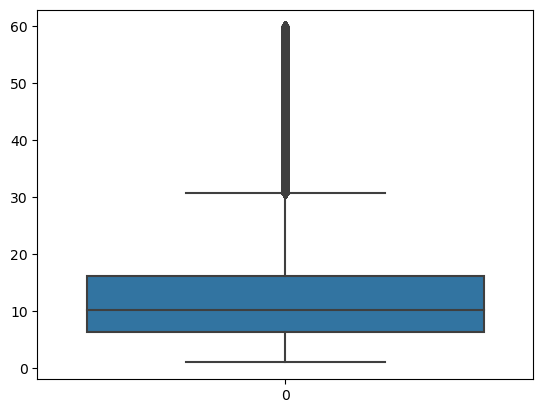

In [46]:
import seaborn as sns
sns.boxplot(df_train["duration"])
num_rows = df_train.shape[0]
lower_limit = 1
upper_limit = 60
print(f"Total number of rows: {num_rows}")
outliers_lower_limit = (df_train["duration"] < lower_limit)
outliers_upper_limit = (df_train["duration"] > upper_limit)
outliers_lower_limit
len_lower = len(df_train['duration'][outliers_lower_limit])
len_upper = len(df_train['duration'][outliers_upper_limit])
print(f"Dropping lower limit outliers: {len_lower}")
print(f"Dropping upper limit outliers: {len_upper}")
percent_left = ((num_rows - len_lower - len_upper)/num_rows * 100)
print(f"Fraction of the records left after you dropped the outliers: {round(percent_left, 1)}%")

In [47]:
# the outliers
df_train['duration'][(outliers_lower_limit | outliers_upper_limit)]

Series([], Name: duration, dtype: float64)

In [48]:
# without the outliers
df_train['duration'][~(outliers_lower_limit | outliers_upper_limit)]

0          17.82
1           8.40
2           8.97
3          10.03
4          37.53
           ...  
2463926     5.97
2463927    10.65
2463928    11.00
2463929    12.05
2463930    27.00
Name: duration, Length: 2421030, dtype: float64

In [49]:
# now we remove them... 
df_train = df_train[~(outliers_lower_limit)]
df_train = df_train[~(outliers_upper_limit)]
df_train.reindex()
print(f"Total number of rows, after removing outliers: {df_train.shape[0]}")

Total number of rows, after removing outliers: 2421030


<Axes: >

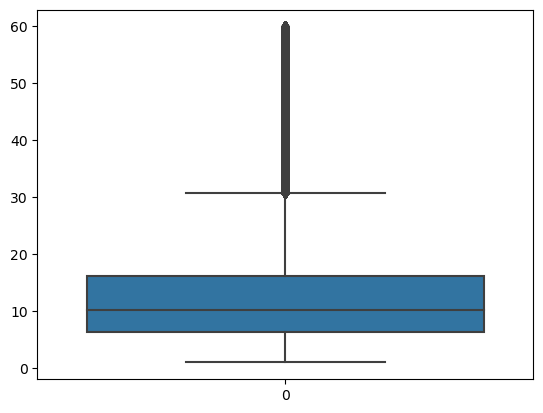

In [19]:
sns.boxplot(df_train["duration"])

## Q4. One-hot encoding

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model. 

* Turn the dataframe into a list of dictionaries
* Fit a dictionary vectorizer 
* Get a feature matrix from it

What's the dimensionality of this matrix (number of columns)?

* 2
* 155
* 345
* **515**
* 715

In [16]:
from sklearn.feature_extraction import DictVectorizer # <== use this to create a sparse one hot encoding of categorical variables
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# we only use 3 features for our model
# pick up and drop off location need to be either categories or strings so that
# the DictVectorizer's one-hot encoding to work. It will not work if we keep them as 
# numbers. 
# print(f"Pick up locations: {len(df_train['PULocationID'].unique())}")
# print(f"Drop off up locations: {len(df_train['DOLocationID'].unique())}")
# df_train["PULocationID"] = df_train["PULocationID"].astype("str")
# df_train["DOLocationID"] = df_train["DOLocationID"].astype("str")

df_train_convert = df_train[catagorical]
train_dicts = df_train_convert.to_dict(orient='records')
print(df_train_convert.dtypes)
print(f"train_dicts looks like: {train_dicts[:2][1]}")

dv = DictVectorizer()
# now we convert the dictionary with one hot encoding for the categorical features
# and no conversion for the other features
X_train = dv.fit_transform(train_dicts)
# how does an item in a sparse array look like? 
# print(X_train.toarray()[:1])
print(f"Shape of the sparse matrix (row, col): {X_train.shape}")


PULocationID    object
DOLocationID    object
dtype: object
train_dicts looks like: {'PULocationID': '236', 'DOLocationID': '42'}
Shape of the sparse matrix (row, col): (2421024, 510)


## Q5. Training a model

Now let's use the feature matrix from the previous step to train a model. 

* Train a plain linear regression model with default parameters 
* Calculate the RMSE of the model on the training data

What's the RMSE on train?

* **6.99**
* 11.99
* 16.99
* 21.99

In [17]:
# remember the duration we calcluated from start and end time? We can use it
# as a target of the prediction... 
y_train = df_train["duration"].values

lr = LinearRegression()
lr.fit(X_train, y_train) # <=== Training time for all X_train values... 

print(f"shape: {X_train.shape}")
y_pred = lr.predict(X_train)

# then calculate the RMSE between X_train and y_pred values
print(f"RMSE: {round(mean_squared_error(y_train, y_pred, squared=False), 4)} mins")

shape: (2421024, 510)
RMSE: 6.9839 mins


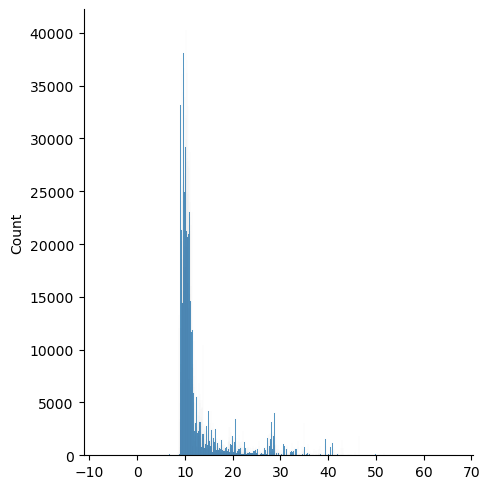

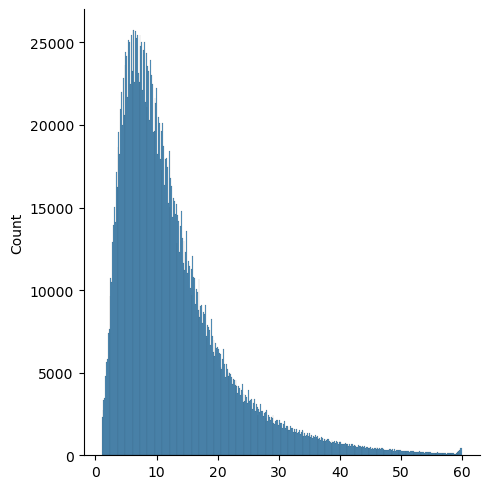

In [53]:
sns.displot(y_pred)
sns.displot(y_train)

## Q6. Evaluating the model

Now let's apply this model to the validation dataset (February 2022). 

What's the RMSE on validation?

* 7.79
* 12.79
* 17.79
* 22.79

In [18]:
# df_vali["duration"] = df_vali.lpep_dropoff_datetime - df_vali.lpep_pickup_datetime
# df_vali.duration = df_vali.duration.apply(lambda time: round(time.total_seconds()/60, 2))
# outliers_lower_limit = (df_vali["duration"] < lower_limit)
# outliers_upper_limit = (df_vali["duration"] > upper_limit)
# print(df_vali.shape)

# df_vali = df_vali[~(outliers_lower_limit)]
# df_vali = df_vali[~(outliers_upper_limit)]
# df_vali.reindex()

# df_vali["PULocationID"] = df_vali["PULocationID"].astype("category")
# df_vali["DOLocationID"] = df_vali["DOLocationID"].astype("category")
# print(f"Pick up locations: {len(df_vali['PULocationID'].unique())}")
# print(f"Drop off up locations: {len(df_vali['DOLocationID'].unique())}")
# # TODO: check why train and validation have different number of categorical types... 
# # print(df_vali)

df_validation = df_validate[catagorical]
print(df_validation.dtypes)
vali_dicts = df_validation.to_dict(orient='records')
print(f"vali_dicts looks like: {vali_dicts[:2]}")

dv_v = DictVectorizer()
# now we convert the dictionary with one hot encoding for the categorical features
# and no conversion for the other features
X_vali = dv_v.fit_transform(vali_dicts)

print(f"shape: {X_vali.shape}")
y_pred = lr.predict(X_vali)

# y_val = df_vali["duration"].values
# print(df_vali.head())
# print(f"RMSE: {round(mean_squared_error(y_val, y_pred, squared=False), 4)} mins")

PULocationID    object
DOLocationID    object
dtype: object
vali_dicts looks like: [{'PULocationID': '138', 'DOLocationID': '252'}, {'PULocationID': '138', 'DOLocationID': '41'}]
shape: (2917760, 514)


ValueError: X has 514 features, but LinearRegression is expecting 510 features as input.

In [13]:
print(f"df_train PULocationID: {len(df_train['PULocationID'].unique())}")
df_train_1 = sorted(df_train["PULocationID"].unique())

print(f"df_validate PULocationID: {len(df_validate['PULocationID'].unique())}")
df_validate_1 = sorted(df_validate["PULocationID"].unique())
drops = list(set(df_train_1) - set(df_validate_1))

for drop in drops:
    df_train.drop(df_train[df_train["PULocationID"] == drop].index, inplace = True)
    df_validate.drop(df_validate[df_validate["PULocationID"] == drop].index, inplace = True)
print(f"df_train PULocationID: {len(df_train['PULocationID'].unique())}")
print(f"df_validate PULocationID: {len(df_validate['PULocationID'].unique())}")


df_train PULocationID: 254
df_validate PULocationID: 254
df_train PULocationID: 250
df_validate PULocationID: 254


In [14]:
print(f"df_train DOLocationID: {len(df_train['DOLocationID'].unique())}")
df_train_2 = sorted(df_train["DOLocationID"].unique())

print(f"df_validate DOLocationID: {len(df_validate['DOLocationID'].unique())}")
df_validate_2 = sorted(df_validate["DOLocationID"].unique())
drops = list(set(df_train_2) - set(df_validate_2))

for drop in drops:
    df_train.drop(df_train[df_train["DOLocationID"] == drop].index, inplace = True)
    df_validate.drop(df_validate[df_validate["DOLocationID"] == drop].index, inplace = True)
print(f"df_train DOLocationID: {len(df_train['DOLocationID'].unique())}")
print(f"df_validate DOLocationID: {len(df_validate['DOLocationID'].unique())}")

df_train DOLocationID: 261
df_validate DOLocationID: 260
df_train DOLocationID: 260
df_validate DOLocationID: 260


## Homework

The goal of this homework is to train a simple model for predicting the duration of a ride - similar to what we did in this module.






## Submit the results

* Submit your results here: https://forms.gle/uYTnWrcsubi2gdGV7
* You can submit your solution multiple times. In this case, only the last submission will be used
* If your answer doesn't match options exactly, select the closest one


## Deadline

The deadline for submitting is 23 May 2023 (Tuesday), 23:00 CEST (Berlin time). 

After that, the form will be closed.